# Results from 754 Data set

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from tensorflow.keras.optimizers import Adam 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ReduceLROnPlateau
import xgboost as xgb

pd.set_option('display.max_columns', None)
plt.style.use('dark_background')

/Users/mahimairaja/opt/anaconda3/envs/aiml/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [15]:
data = pd.read_csv('pd_speech_features.csv')
data




id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0      0       1  0.85247  0.71826  0.57227        240               239   
1      0       1  0.76686  0.69481  0.53966        234               233   
2      0       1  0.85083  0.67604  0.58982        232               231   
3      1       0  0.41121  0.79672  0.59257        178               177   
4      1       0  0.32790  0.79782  0.53028        236               235   
..   ...     ...      ...      ...      ...        ...               ...   
751  250       0  0.80903  0.56355  0.28385        417               416   
752  250       0  0.16084  0.56499  0.59194        415               413   
753  251       0  0.88389  0.72335  0.46815        381               380   
754  251       0  0.83782  0.74890  0.49823        340               339   
755  251       0  0.81304  0.76471  0.46374        340               339   

     meanPeriodPulses  stdDevPeriodPulses  locPctJitter  locAbsJitter  \
0            0.008064            0.000087       0.00218      0.000018   
1            0.008258            0.000073       0.00195      0.000016   
2            0.008340            0.000060       0.00176      0.000015   
3            0.010858            0.000183       0.00419      0.000046   
4            0.008162            0.002669       0.00535      0.000044   
..                ...                 ...           ...           ...   
751          0.004627            0.000052       0.00064      0.000003   
752          0.004550            0.000220       0.00143      0.000006   
753          0.005069            0.000103       0.00076      0.000004   
754          0.005679            0.000055       0.00092      0.000005   
755          0.005676            0.000037       0.00078      0.000004   

     rapJitter  ppq5Jitter  ddpJitter  locShimmer  locDbShimmer  apq3Shimmer  \
0      0.00067     0.00129    0.00200     0.05883         0.517      0.03011   
1      0.00052     0.00112    0.00157     0.05516         0.502      0.02320   
2      0.00057     0.00111    0.00171     0.09902         0.897      0.05094   
3      0.00149     0.00268    0.00446     0.05451         0.527      0.02395   
4      0.00166     0.00227    0.00499     0.05610         0.497      0.02909   
..         ...         ...        ...         ...           ...          ...   
751    0.00008     0.00022    0.00024     0.01947         0.171      0.01068   
752    0.00016     0.00041    0.00047     0.04291         0.482      0.02307   
753    0.00011     0.00030    0.00034     0.02978         0.263      0.01597   
754    0.00017     0.00041    0.00052     0.03552         0.311      0.01791   
755    0.00014     0.00033    0.00042     0.03702         0.326      0.01940   

     apq5Shimmer  apq11Shimmer  ddaShimmer  meanAutoCorrHarmonicity  \
0        0.03496       0.04828     0.09034                 0.970805   
1        0.03675       0.06195     0.06961                 0.984322   
2        0.06497       0.07772     0.15282                 0.974846   
3        0.02857       0.04462     0.07185                 0.968343   
4        0.03327       0.05278     0.08728                 0.975754   
..           ...           ...         ...                      ...   
751      0.01260       0.01547     0.03204                 0.997438   
752      0.02626       0.03272     0.06920                 0.976867   
753      0.01916       0.02271     0.04790                 0.995544   
754      0.02348       0.02648     0.05373                 0.988241   
755      0.02332       0.02765     0.05820                 0.996402   

     meanNoiseToHarmHarmonicity  meanHarmToNoiseHarmonicity  minIntensity  \
0                      0.036223                      18.995     69.997496   
1                      0.017974                      21.497     67.415903   
2                      0.026313                      17.651     62.661706   
3                      0.042003                      19.865     76.306989   
4                

In [18]:
new_data = data[['numPulses','numPeriodsPulses','meanPeriodPulses','stdDevPeriodPulses',
                'locPctJitter', 'locAbsJitter', 'rapJitter','ppq5Jitter','ddpJitter',
                'locShimmer', 'locDbShimmer','apq3Shimmer','apq5Shimmer','apq11Shimmer',
                'ddaShimmer', 'meanAutoCorrHarmonicity','meanNoiseToHarmHarmonicity',
                'meanHarmToNoiseHarmonicity', 'class']]
new_data

,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,class
0,240,239,0.008064,0.000087,0.00218,0.000018,0.00067,0.00129,0.00200,0.05883,0.517,0.03011,0.03496,0.04828,0.09034,0.970805,0.036223,18.995,1
1,234,233,0.008258,0.000073,0.00195,0.000016,0.00052,0.00112,0.00157,0.05516,0.502,0.02320,0.03675,0.06195,0.06961,0.984322,0.017974,21.497,1
2,232,231,0.008340,0.000060,0.00176,0.000015,0.00057,0.00111,0.00171,0.09902,0.897,0.05094,0.06497,0.07772,0.15282,0.974846,0.026313,17.651,1
3,178,177,0.010858,0.000183,0.00419,0.000046,0.00149,0.00268,0.00446,0.05451,0.527,0.02395,0.02857,0.04462,0.07185,0.968343,0.042003,19.865,1
4,236,235,0.008162,0.002669,0.00535,0.000044,0.00166,0.00227,0.00499,0.05610,0.497,0.02909,0.03327,0.05278,0.08728,0.975754,0.027139,19.557,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,417,416,0.004627,0.000052,0.00064,0.000003,0.00008,0.00022,0.00024,0.01947,0.171,0.01068,0.01260,0.01547,0.03204,0.997438,0.002571,26.813,0
752,415,413,0.004550,0.000220,0.00143,0.000006,0.00016,0.00041,0.00047,0.04291,0.482,0.02307,0.02626,0.03272,0.06920,0.976867,0.025519,17.802,0
753,381,380,0.005069,0.000103,0.00076,0.000004,0.00011,0.00030,0.00034,0.02978,0.263,0.01597,0.01916,0.02271,0.04790,0.995544,0.004480,24.005,0
754,340,339,0.005679,0.000055,0.00092,0.000005,0.00017,0.00041,0.00052,0.03552,0.311,0.01791,0.02348,0.02648,0.05373,0.988241,0.011931,19.706,0


<AxesSubplot:>

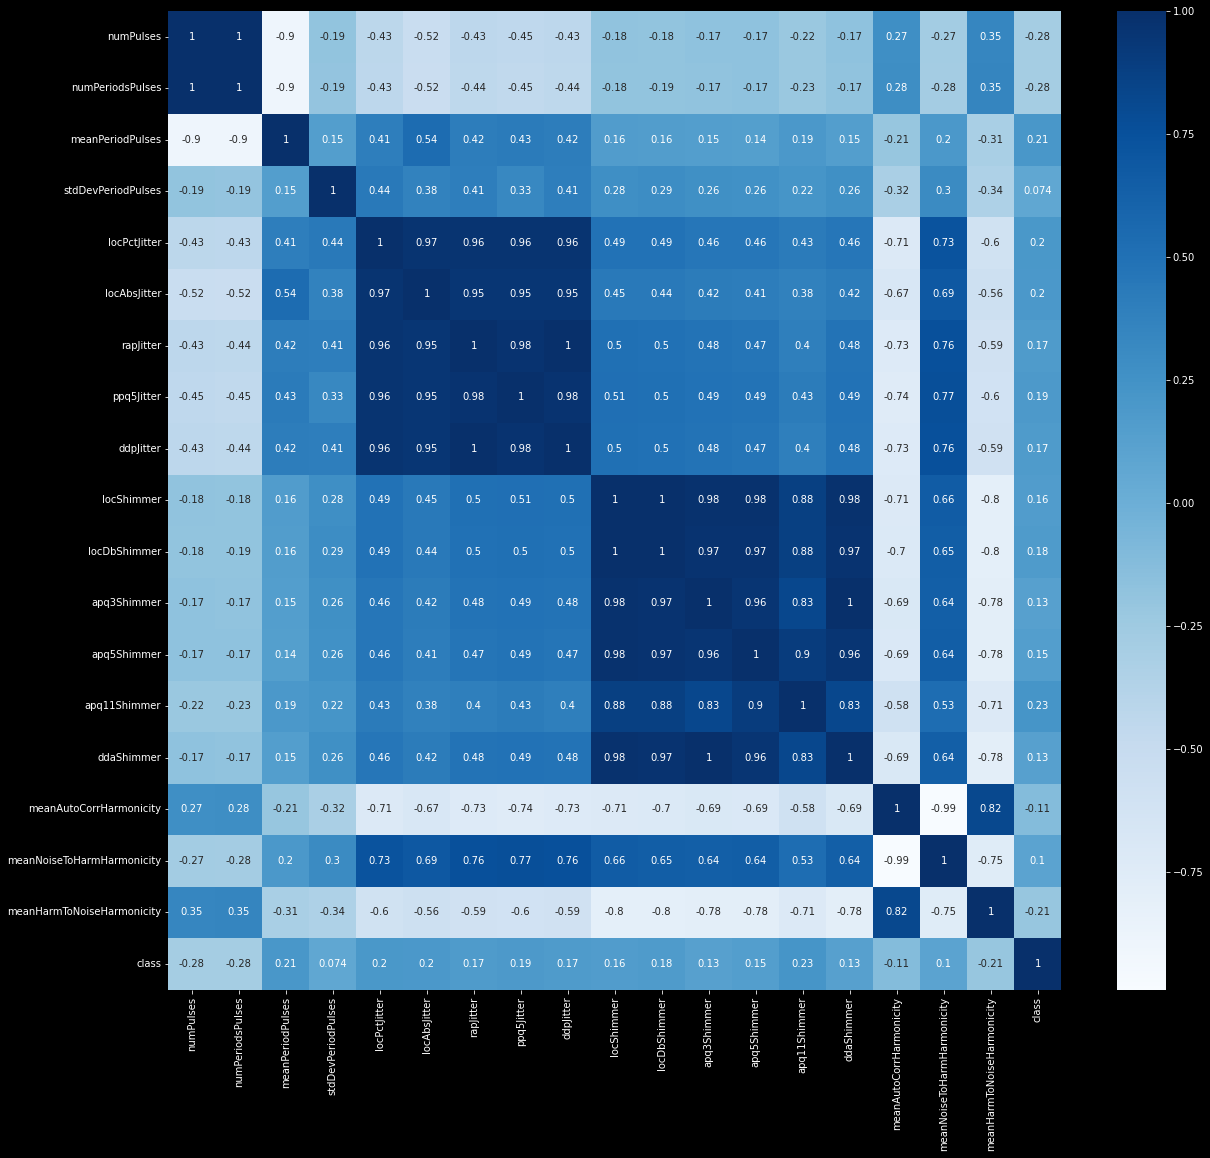

In [27]:
plt.figure(figsize=(20,18))
sns.heatmap(new_data.corr(), annot=True, cmap= "Blues")

In [29]:
independent = new_data.drop('class', axis=1)
independent.columns.value_counts().sum()

Input = independent.values
# Input = np.percentile(Input, float(U9))
Input = Input.astype('float')
Output = new_data['class'].values
Output = Output.astype('float')


type(Output)

numpy.ndarray

In [57]:
x_train, x_test, y_train, y_test = train_test_split(Input,
                                                    Output, 
                                                    test_size=0.2, 
                                                    stratify=Output, 
                                                    random_state=43)

In [58]:
models = {
    '           Linear SVM': LinearSVC(),
    '        XGBClassifier': xgb.XGBClassifier(),
    '    Gradient Boosting': GradientBoostingClassifier(),
    '        Decision Tree': DecisionTreeClassifier(),
    '        Random Forest': RandomForestClassifier(),
    ' KNeighborsClassifier': KNeighborsClassifier(),
    '   Bagging Classifier': BaggingClassifier()
}

for name, model in models.items():
    model = model.fit(x_train, y_train)
    print(name + " trained")

/Users/mahimairaja/opt/anaconda3/envs/aiml/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mahimairaja/opt/anaconda3/envs/aiml/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


           Linear SVM trained
[15:31:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
        XGBClassifier trained
    Gradient Boosting trained
        Decision Tree trained
        Random Forest trained
 KNeighborsClassifier trained
   Bagging Classifier trained


In [59]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(x_train, y_train) * 100))

           Linear SVM: 74.67%
        XGBClassifier: 100.00%
    Gradient Boosting: 95.53%
        Decision Tree: 100.00%
        Random Forest: 100.00%
 KNeighborsClassifier: 80.63%
   Bagging Classifier: 99.67%


In [60]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(x_test, y_test) * 100))

           Linear SVM: 74.34%
        XGBClassifier: 74.34%
    Gradient Boosting: 81.58%
        Decision Tree: 71.71%
        Random Forest: 79.61%
 KNeighborsClassifier: 71.05%
   Bagging Classifier: 75.00%


---

In [61]:
model = Sequential()

model.add(Dense(9, input_dim=18, activation='relu'))

model.add(Dense(32,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 9)                 171       
                                                                 
 dense_17 (Dense)            (None, 32)                320       
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 524
Trainable params: 524
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(learning_rate=0.0001), 
              metrics=['accuracy'])

In [63]:
reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                             factor=0.2,
                             patience=3,
                             verbose=1,
                             min_delta=0.001)

history = model.fit(x=x_train,y=y_train, 
          validation_data=(x_test, y_test),
          batch_size=18, 
          epochs=101,
          callbacks=reduce_learningrate)

Epoch 1/101
34/34 [==============================] - 0s 3ms/step - loss: 6.2799 - accuracy: 0.7467 - val_loss: 5.0883 - val_accuracy: 0.7434 - lr: 1.0000e-04
Epoch 2/101
34/34 [==============================] - 0s 1ms/step - loss: 3.5511 - accuracy: 0.7467 - val_loss: 2.2726 - val_accuracy: 0.7434 - lr: 1.0000e-04
Epoch 3/101
34/34 [==============================] - 0s 1ms/step - loss: 1.1890 - accuracy: 0.6821 - val_loss: 0.7708 - val_accuracy: 0.5789 - lr: 1.0000e-04
Epoch 4/101
34/34 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.6573 - val_loss: 0.6902 - val_accuracy: 0.6776 - lr: 1.0000e-04
Epoch 5/101
34/34 [==============================] - 0s 1ms/step - loss: 0.6725 - accuracy: 0.6921 - val_loss: 0.7253 - val_accuracy: 0.5987 - lr: 1.0000e-04
Epoch 6/101
34/34 [==============================] - 0s 1ms/step - loss: 0.6863 - accuracy: 0.6639 - val_loss: 0.6944 - val_accuracy: 0.6382 - lr: 1.0000e-04
Epoch 7/101
34/34 [==============================] -

34/34 [==============================] - 0s 1ms/step - loss: 0.6392 - accuracy: 0.7036 - val_loss: 0.6495 - val_accuracy: 0.6908 - lr: 3.2000e-08
Epoch 48/101
 1/34 [..............................] - ETA: 0s - loss: 0.7146 - accuracy: 0.6111
Epoch 48: ReduceLROnPlateau reducing learning rate to 6.399999818995639e-09.
34/34 [==============================] - 0s 1ms/step - loss: 0.6392 - accuracy: 0.7036 - val_loss: 0.6495 - val_accuracy: 0.6908 - lr: 3.2000e-08
Epoch 49/101
34/34 [==============================] - 0s 1ms/step - loss: 0.6392 - accuracy: 0.7036 - val_loss: 0.6495 - val_accuracy: 0.6908 - lr: 6.4000e-09
Epoch 50/101
34/34 [==============================] - 0s 1ms/step - loss: 0.6392 - accuracy: 0.7036 - val_loss: 0.6495 - val_accuracy: 0.6908 - lr: 6.4000e-09
Epoch 51/101
 1/34 [..............................] - ETA: 0s - loss: 0.3648 - accuracy: 0.9444
Epoch 51: ReduceLROnPlateau reducing learning rate to 1.279999928271991e-09.
34/34 [==============================] - 0s 

34/34 [==============================] - 0s 1ms/step - loss: 0.6392 - accuracy: 0.7036 - val_loss: 0.6495 - val_accuracy: 0.6908 - lr: 2.6214e-17
Epoch 86/101
34/34 [==============================] - 0s 1ms/step - loss: 0.6392 - accuracy: 0.7036 - val_loss: 0.6495 - val_accuracy: 0.6908 - lr: 2.6214e-17
Epoch 87/101
 1/34 [..............................] - ETA: 0s - loss: 0.6656 - accuracy: 0.7778
Epoch 87: ReduceLROnPlateau reducing learning rate to 5.2428798336199434e-18.
34/34 [==============================] - 0s 1ms/step - loss: 0.6392 - accuracy: 0.7036 - val_loss: 0.6495 - val_accuracy: 0.6908 - lr: 2.6214e-17
Epoch 88/101
34/34 [==============================] - 0s 1ms/step - loss: 0.6392 - accuracy: 0.7036 - val_loss: 0.6495 - val_accuracy: 0.6908 - lr: 5.2429e-18
Epoch 89/101
34/34 [==============================] - 0s 1ms/step - loss: 0.6392 - accuracy: 0.7036 - val_loss: 0.6495 - val_accuracy: 0.6908 - lr: 5.2429e-18
Epoch 90/101
 1/34 [..............................] - ETA

/var/folders/ts/4y5v3zns7x5c84jf9byws_nc0000gn/T/ipykernel_36819/785622656.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'b', label='Training acc', color = 'red')
/var/folders/ts/4y5v3zns7x5c84jf9byws_nc0000gn/T/ipykernel_36819/785622656.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Training loss', color = 'red')


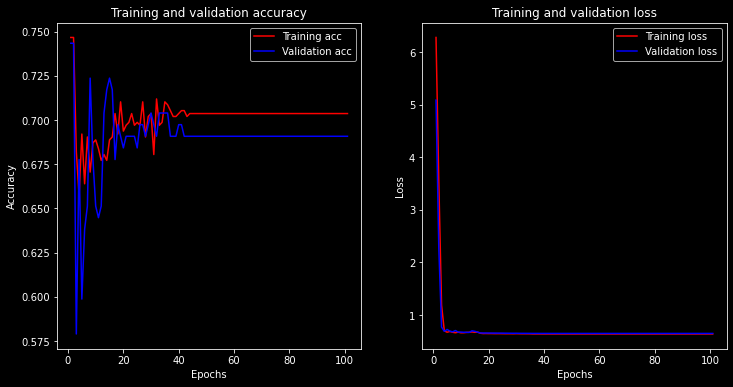

In [64]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc', color = 'red')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
 
    
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b', label='Training loss', color = 'red')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()